# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики.

In [286]:
import numpy as np
import matplotlib.pyplot as plt


import scipy.stats as sps
coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

def uniform(size=1, precision=30):
    if (type(size) is int):
        size = (size, )
    return (coin((*size,precision))*np.geomspace(start=0.5, stop=2**(-precision), num=precision, endpoint
=True)).sum(axis=len(size))


def plot_uniform_density(size=200):
    sample = uniform(size)
    fig, ax = plt.subplots()
    
    ax.scatter(sample, np.zeros(size), alpha=0.4)
    plt.title("Выборки")
    
    ax.hist(sample,bins=10, density=True, alpha=0.4)
    grid = np.linspace(start=-0.25, stop=1.25, num=500)
    
    ax.plot(grid, uniform_pdf(grid))
    plt.xlim(-0.25,1.25)
    plt.xlabel("Зачение")
    plt.ylabel("Плотность")
    fig.set_figwidth(10)
    fig.set_figheight(4)
    return plt.gcf()


def plot_uniform_different_precision(size=100):
    fig, ax = plt.subplots()

    fig.set_figwidth(15)
    fig.set_figheight(3)
    
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i+1)
        plt.suptitle('Распределения случайных величин')
        plt.scatter(uniform(size, precision), np.zeros(size), alpha=0.4)

        plt.yticks([])
        if i < 4:
            plt.xticks([])

    return plt.gcf()

def normal(size=1, loc=0, scale=1, precision=30):
    r = uniform(size, precision)
    fi = uniform(size, precision)
    return scale * (np.cos(2*np.pi*r)) * np.sqrt(-2*np.log(fi)) + loc


def plot_normal_density(size=200):
    sample = normal(size)
    fig, ax = plt.subplots()
    
    ax.scatter(sample, np.zeros(size), alpha=0.4)
    plt.title("Выборки")
    
    ax.hist(sample,bins=10, density=True, alpha=0.4)
    grid = np.linspace(start=-3, stop=3, num=500)
    
    ax.plot(grid, norm_pdf(grid))
    plt.xlim(-3,3)
    plt.xlabel("Зачение")
    plt.ylabel("Плотность")
    fig.set_figwidth(10)
    fig.set_figheight(4)
    return plt.gcf()


def expon(size=1, lambd=1, precision=30):
    un_val = uniform(size, precision)
    return ((-1/lambd)*np.log(1-un_val))


def plot_expon_density(size=100):
    sample = expon(size)
    fig, ax = plt.subplots()
    
    ax.scatter(sample, np.zeros(size), alpha=0.4)
    plt.title("Выборки")
    
    ax.hist(sample,bins=10, density=True, alpha=0.4)
    grid = np.linspace(start=-0.5, stop=5, num=500)
    
    ax.plot(grid, expon_pdf(grid))
    plt.xlim(-0.5,5)
    plt.xlabel("Зачение")
    plt.ylabel("Плотность")
    fig.set_figwidth(10)
    fig.set_figheight(4)
    return plt.gcf()

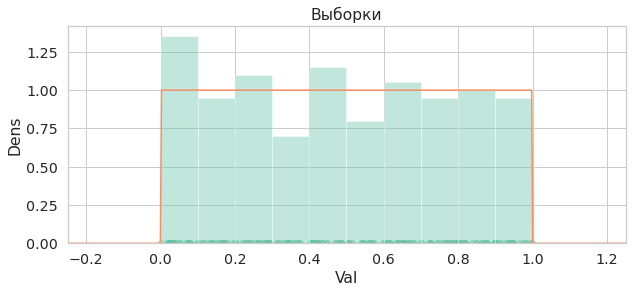

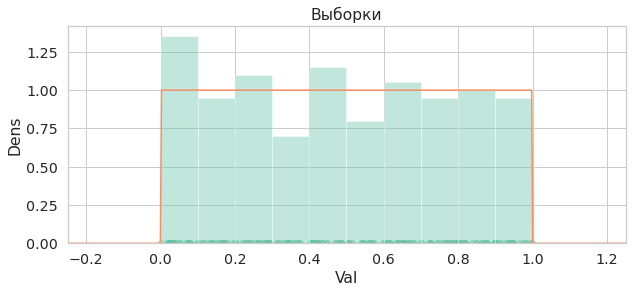

In [199]:
plot_uniform_density()

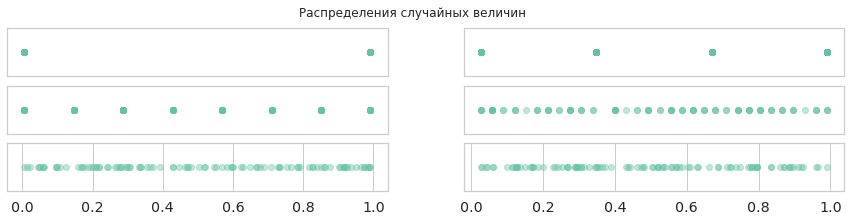

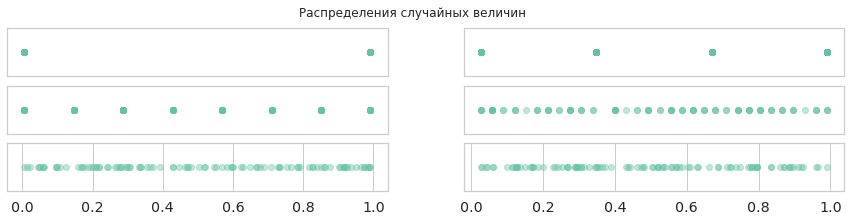

In [202]:
plot_uniform_different_precision()

Видим, что чем больше precision, тем значения случайных величин стоят плотнее друг к другу.

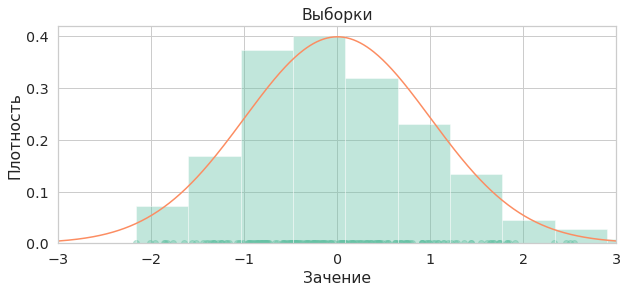

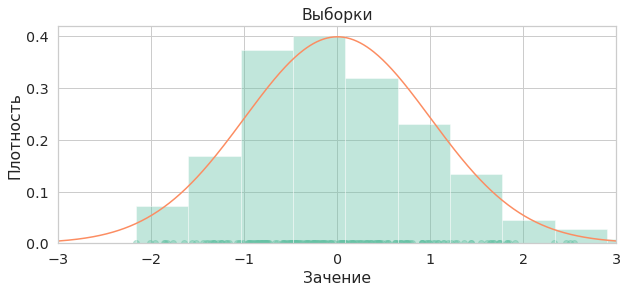

In [206]:
plot_normal_density()

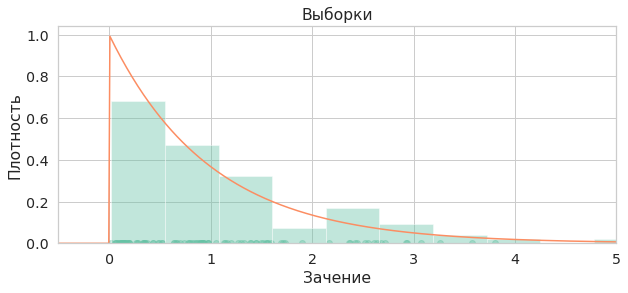

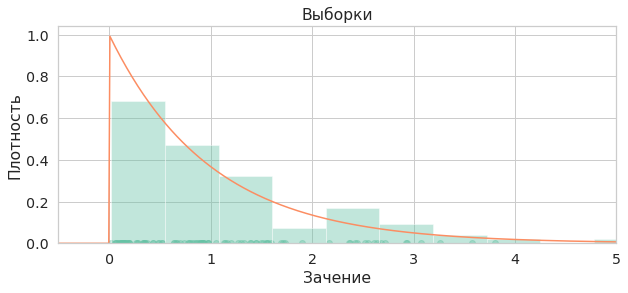

In [287]:
plot_expon_density()

**Выводы:**

Пронаблюдали как генерировать равномерное распределение и его плонтность. Также увидели зависмость между случайными величинами и точностью их генерации.
Аналогично увидели плонтности нормального и экспонинциального распределения. 

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

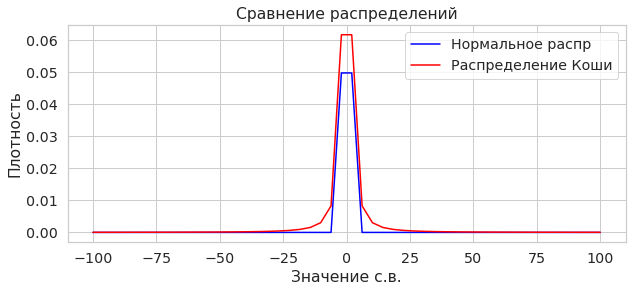

In [262]:
import scipy.stats as sps
norm_sample = sps.norm.rvs(size=1000)
cauchy_sample = sps.cauchy.rvs(size=1000)

fig, ax = plt.subplots()

norm_grid = np.linspace(start=-100, stop=100)
cauchy_grid = np.linspace(start=-100, stop=100)
ax.plot(norm_grid, sps.norm.pdf(norm_grid), color="blue", label="Нормальное распр")
ax.plot(cauchy_grid, sps.cauchy.pdf(cauchy_grid), color="red", label="Распределение Коши")
plt.xlabel("Значение с.в.")
plt.ylabel("Плотность")
plt.title('Сравнение распределений')
plt.legend()
fig.set_figwidth(10)
fig.set_figheight(4)

Как и ожидалось, при небольших значениях нормальное распределение и расрпделение Коши похоже. Однако, даже на небольших значениях уже можно пронаблюдать, что плотность распредления Коши больше. При стремлении значения к бескончености, можно будет дальше увидеть, что плотность нормального распределения сильно меньше плотности распределения Коши. 

**2.** Повторите эксперимент с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

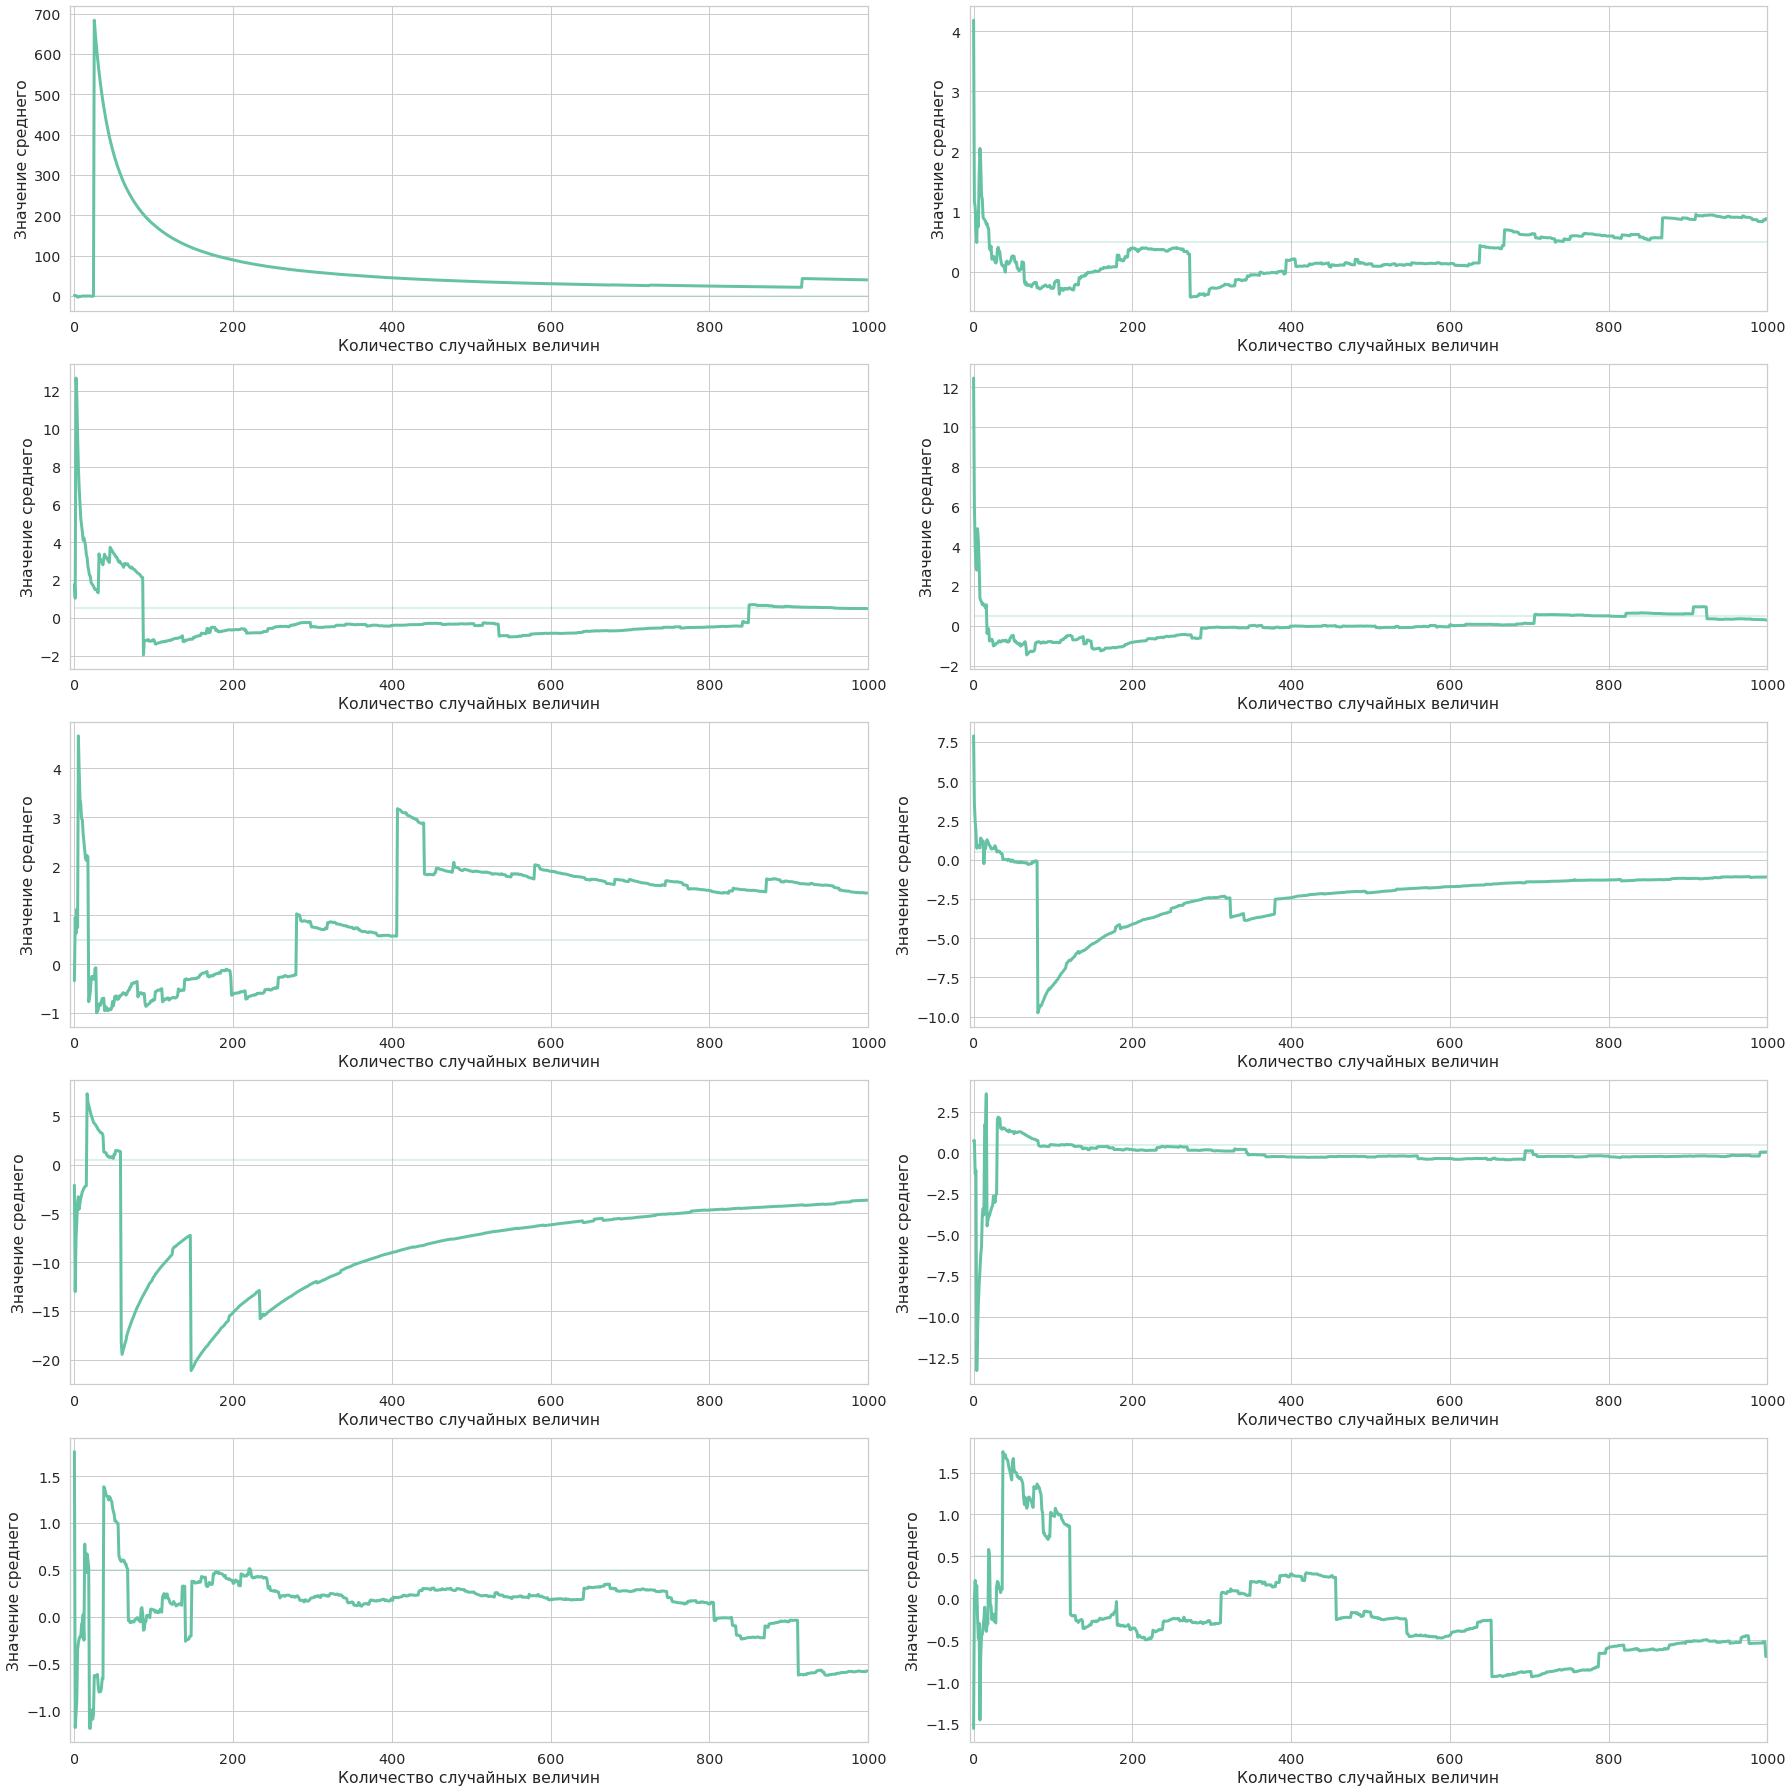

In [53]:
size=1000

plt.figure(figsize=(25, 25))
for i in range(10):
    samples = sps.cauchy.rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
plt.tight_layout()

Наглядно видим, что ЗБЧ в общем случае, не выполянется для независимых случайнх величин их распределения Коши.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

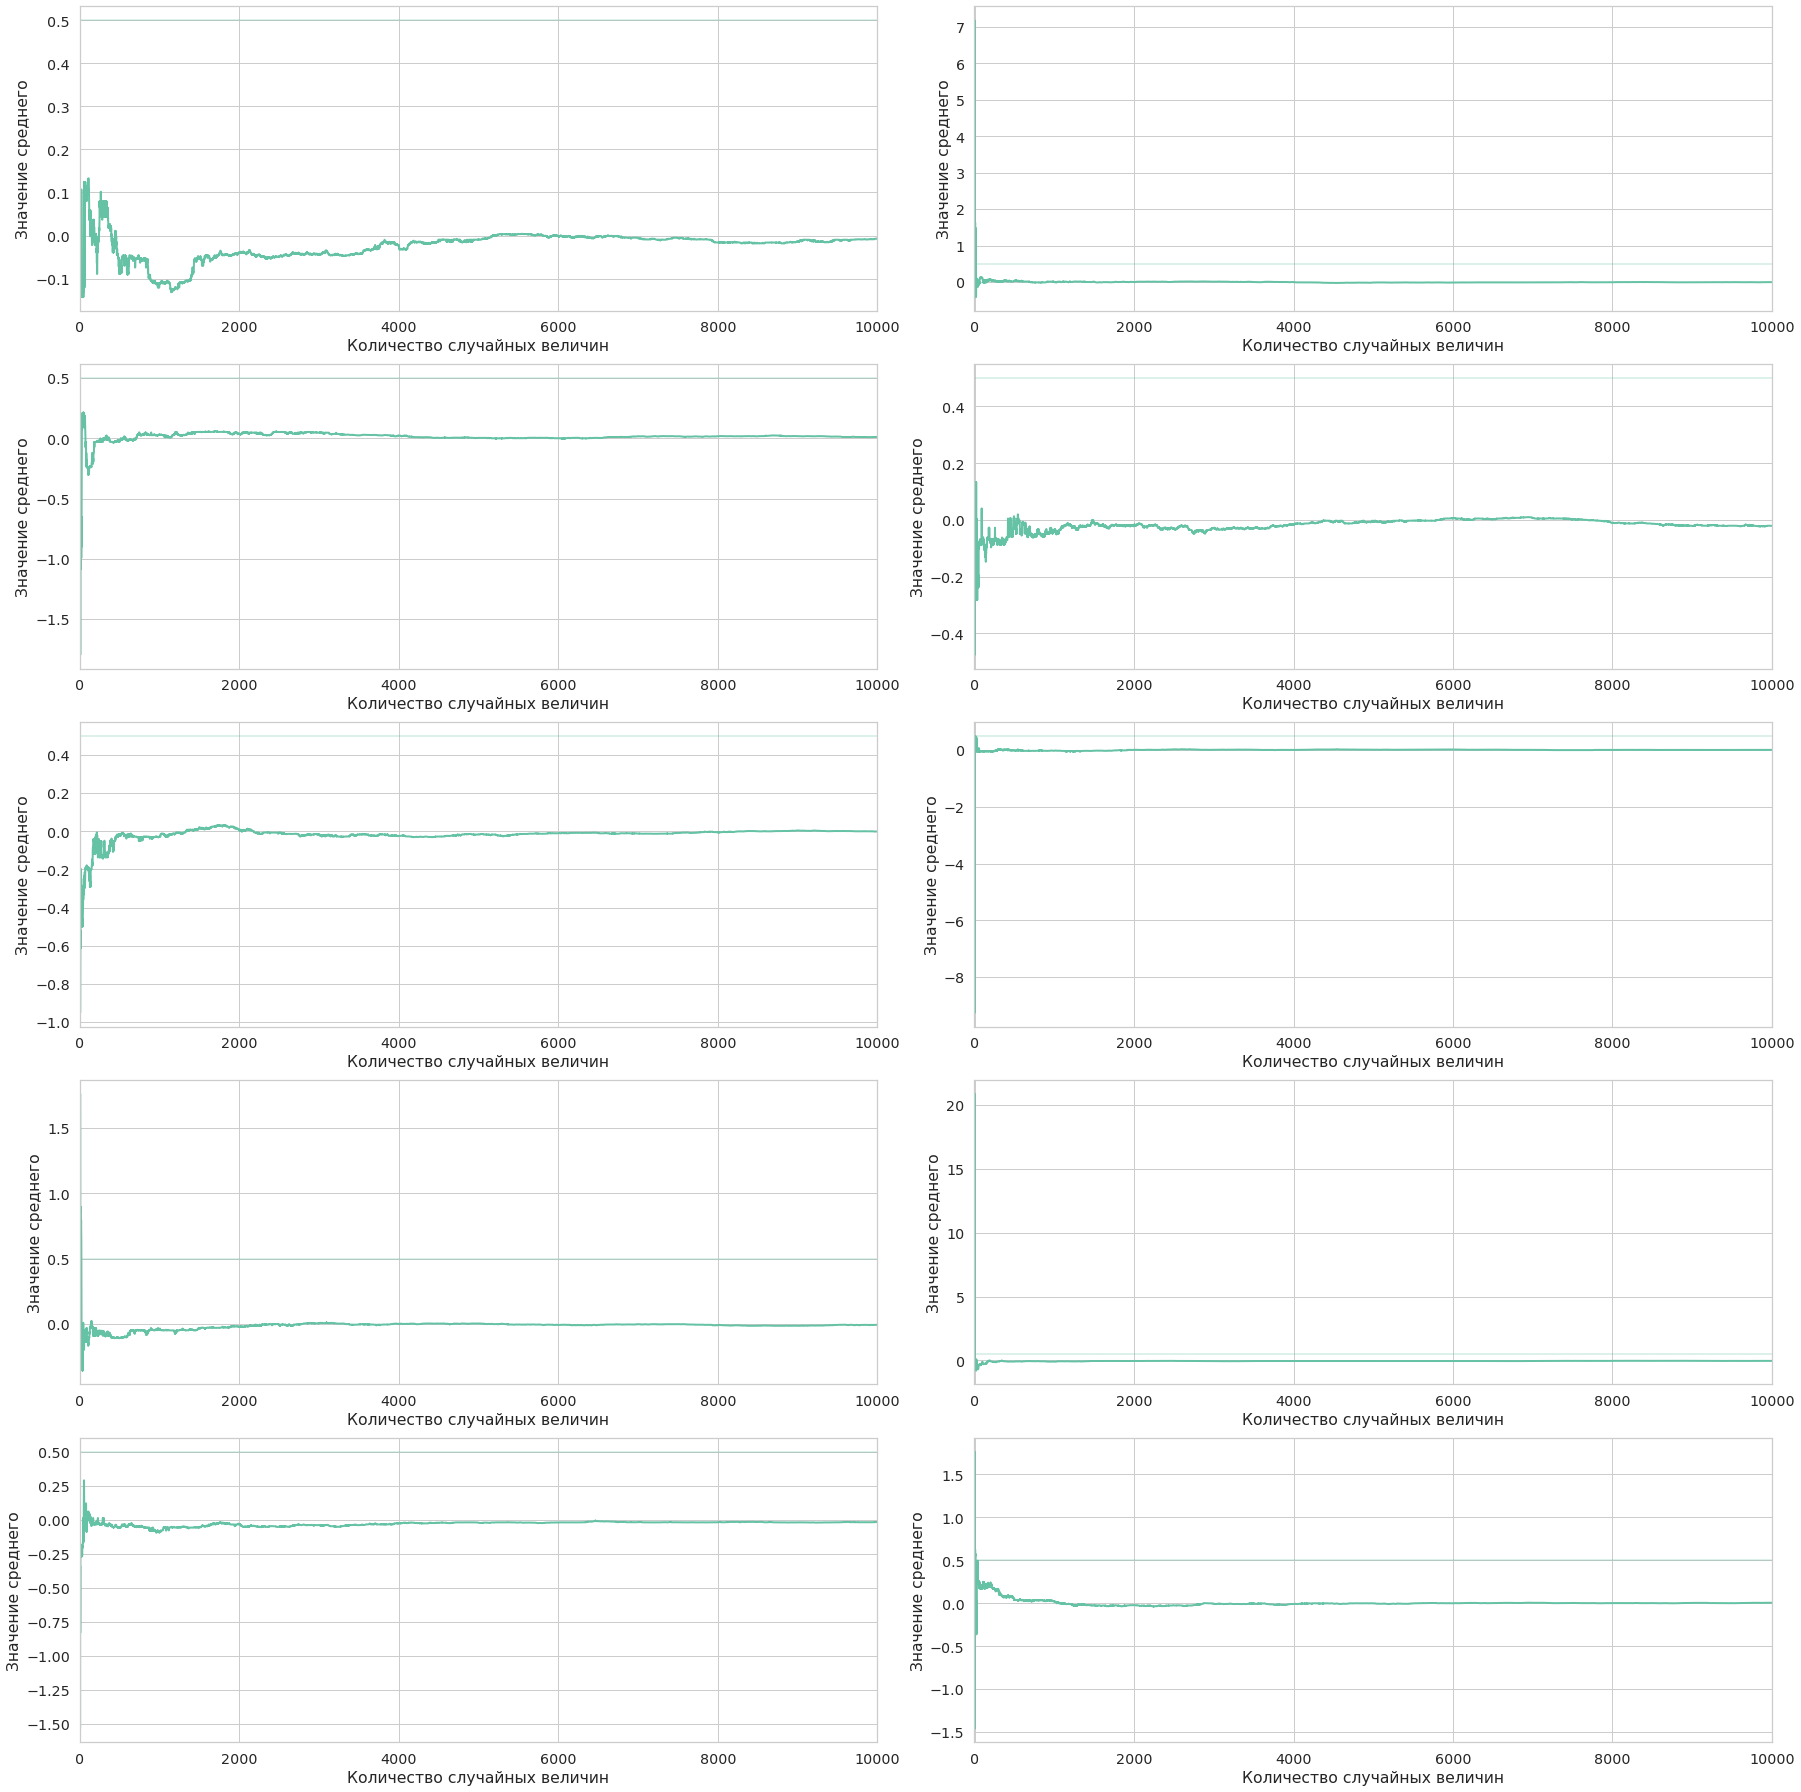

In [212]:
plt.figure(figsize=(25, 25))
size = 10000
for j in range(10):
    
    sample = sps.cauchy.rvs(size=size)
    medians = np.zeros(size)
    for i in range(1,size):
        medians[i] = np.median(sample[:i])
    
    plt.subplot(5, 2, j+1)
    plt.plot(medians,linewidth=2)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, 10000))
plt.tight_layout()

Видим, что при увеличении количества случайных величин, медиана выравнивается к оси.

**Вывод:**

Сравнили нормальное распределение и распределение Коши. Наглядно показали, что ЗБЧ не будет выполняться для независимых случайных величин из распределения Коши, и пронаблюдали зависимость выборочной медианы от размера самой выборки.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах.

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [274]:
K = 500
size = 500

sample = sps.bernoulli(p=0.5).rvs(size=(size,K))

cum_sum = sample.cumsum(axis=1) / (np.arange(size) + 1)

tmp = np.abs(cum_sum - 1/2)
ans = (1/K)*tmp.sum(axis=0)

final_ans = np.where(ans<=0.02)

print(final_ans[0][0])

431


Text(0, 0.5, 'Среднее отклонение')

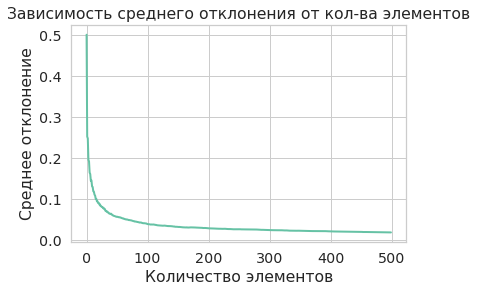

In [275]:
plt.plot(ans,linewidth=2)
plt.title('Зависимость среднего отклонения от кол-ва элементов')
plt.xlabel('Количество элементов')
plt.ylabel('Среднее отклонение')

Text(0, 0.5, 'Среднее отклонение')

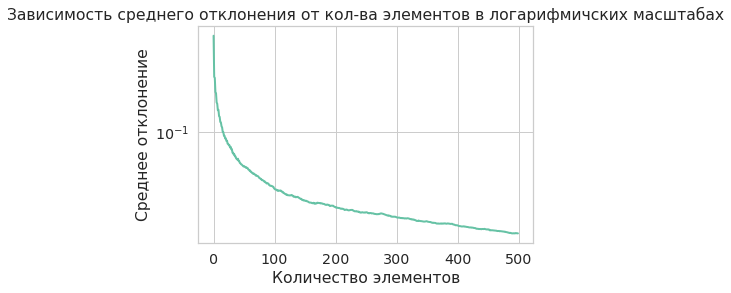

In [276]:
plt.plot(ans,linewidth=2)
plt.yscale('log')
plt.title('Зависимость среднего отклонения от кол-ва элементов в логарифмичских масштабах')
plt.xlabel('Количество элементов')
plt.ylabel('Среднее отклонение')

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

Text(0, 0.5, 'Количество элементов')

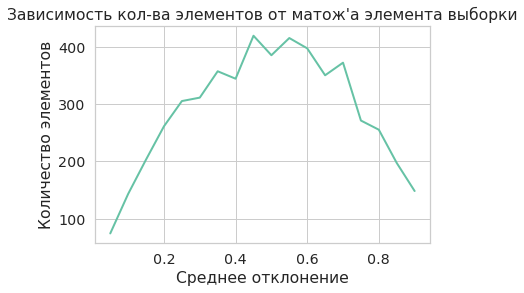

In [295]:
i = 0;
arr = np.arange(0.05, 0.95, 0.05)
arr_ans = np.zeros(len(arr))
for item in arr:
    sample = sps.bernoulli(p=item).rvs(size=(size,K))

    cum_sum = sample.cumsum(axis=1) / (np.arange(size) + 1)
    
    tmp = np.abs(cum_sum - item)
    ans = (1/K)*tmp.sum(axis=0)

    tmp_ans = np.where(ans<=0.02)
    arr_ans[i] = tmp_ans[0][0]
    i+=1
    
plt.plot(arr, arr_ans, linewidth=2)
plt.title("Зависимость кол-ва элементов от матож'а элемента выборки")
plt.xlabel('Среднее отклонение')
plt.ylabel('Количество элементов')


**Выводы:**

Пронаблюдали среднее отклонение в зависиости от количества элементов. Также, наглядно показали что в случае больших отколнений количество элементов не играет роли.